$$\textbf{Optimización I. Tarea 3}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{lightblue}{Librerías \space }$ <br>

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from math import sqrt

In [197]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)

Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3


In [198]:
#imprimimos el epsilon de la máquina
epsilon = np.finfo(float).eps
print("Epsilon de la máquina:", epsilon)

Epsilon de la máquina: 2.220446049250313e-16


$\color{lightblue}{Ejercicio \space 1}$ <br>

1. Programar la función que implementa el algoritmo de backtracking 
   (Algoritmo 2 de la Clase 6) que usa la condición de descenso suficiente
   (condición de Armijo) para seleccionar el tamaño de paso.

In [199]:
def backtracking(alpha_ini,rho,c,x_k,f,f_k,df_k,p_k,iter_max):

    '''
        Esta funcion parte de un tamaño de paso inicial alpha_ini y lo va recortando hasta que
        cumple la cond de descenso suficiente

        parametros:
            valores (float): alpha_ini, rho entre (0,1), f(x_k), Df(x_k) (gradiente en el punto x_k), c_1, 
            direccion de descenso (np.rray): p_k 

        returns:
            el tamaño de paso a_k
            numero de iteraciones realizadas i_k
    '''

    alpha=alpha_ini #fijamos alpha como el alpha inicial
    gp=c*np.dot(df_k,p_k) #hacemos el producto gradiente por direccion de descenso p
    
    for i in range(iter_max):
        x_kp=x_k+alpha*p_k

        #si la condicion de descenso se cumple, terminamos
        if f(x_kp)<=(f_k + alpha*gp):
            return alpha,i,True

        alpha=alpha*rho #si no se cumple la cond, hacemos alpha*rho


        
    return  alpha,i,False

2. Programar la función que implementa el algoritmo de descenso máximo con
   backtracking

In [200]:
def descenso_maximo_backtracking(f,df,x0,alpha_ini,rho,c,tau,max_iter,max_iter_b):
    '''
    Esta funcion busca el minimo de la funcion f usando la tecnica de backtracking

    Parametros: 
        f: función a optimizar
        df: gradiente de f
        x_0: valor inicial
        tau,N: tolerancia y numero maximo de iteraciones (descenso)
        parametros de 

        NOTA:los argumentos predeterminados son específicos para este ejercicio y n=2
    
    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de iteraciones
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array)
        
    '''
    n=len(x0)
    x_k=x0
    indicador=False
    f_k=f(x_k)
    df_k=df(x_k)


    if n==2:
        m = np.zeros((max_iter+1,4))
        m[0,:] = x0[0],x0[1],1,0
    
 
    for k in range(max_iter):
        #calculmos pk y ak
        p_k=-df_k
        a_k,i,ind=backtracking(alpha_ini,rho,c,x_k,f,f_k,df_k,p_k,max_iter_b)
   
        if not ind:
            print('Insuficientes iteraciones Backtracking', a_k)

        x_k=x_k+(a_k*p_k)
        
        if n==2:
            m[k,:]= x_k[0],x_k[1],a_k,i


        if norm(a_k*p_k)<tau:#si se cumple la condicion de tolerania:
            indicador=True #indicador verdadero
            break #y romepos el ciclo

        f_k=f(x_k)
        df_k=df(x_k)

        
    if n==2:
        return x_k,k,indicador,m
    
    return x_k,k,indicador,None

#definicion de funcion para para las graficas dee los contornos

def contornosFnc2D(fncf, puntos, xleft, xright, ybottom, ytop, levels):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x, y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contourf(mX, mY, mZ, levels, cmap='coolwarm')
    plt.colorbar(CS, ax=ax)
    # Grafica los puntos dados
    puntos_x = [p[0] for p in puntos]
    puntos_y = [p[1] for p in puntos]
    ax.plot(puntos_x, puntos_y, 'r-',label="Sucesión")
    ax.plot(puntos_x[0], puntos_y[0], 'g*',label="punto inicial")
    ax.plot(puntos_x[-1], puntos_y[-1], 'b*',label="mínimo encontrado")
     # Grafica los puntos como puntos rojos
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Contornos de la función sucesión')
    plt.legend()
    plt.show()

3. Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente 
   de manera analítica y programe la función correspondiente. Use cada punto 
   $\mathbf{x}_0$ como punto inicial del algoritmo.  


In [201]:
tau = sqrt(epsilon) #tolerancia (después multiplicaremos por sqrt(n))
aini = 1.0 
rho  = 0.8 
c1   = 0.1
N    = 30000 #iter maximas para descenso
Nb   = 600 #iter maximas para backtracking

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$


In [202]:
# Función objetivo
def Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2;

# Gradiente de la función objetivo
def D_Himmelblau(x):
    gx = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    gy = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([gx, gy])


$$ \mathbf{x}_0 = (2.,4.) $$


It =  29
x_k       =  [3. 2.]
f(x_k)    =  1.8538214857463432e-15
||gk||   =  5.367840645520693e-07
a_k promedio=  0.019450891494074314
It promedio (Backtracking)=  18.448275862068964
Sí se cumplio el criterio de convergencia


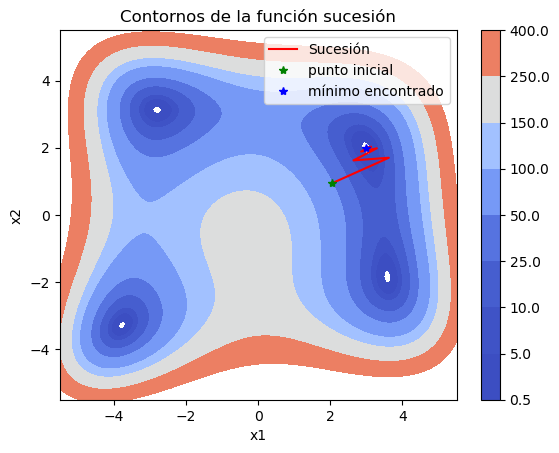

In [203]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Himmelblau,D_Himmelblau,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (0.,0.) $$

It =  32
x_k       =  [3. 2.]
f(x_k)    =  1.7063352093223733e-15
||gk||   =  5.056757838905645e-07
a_k promedio=  0.0243057727977292
It promedio (Backtracking)=  18.03125
Sí se cumplio el criterio de convergencia


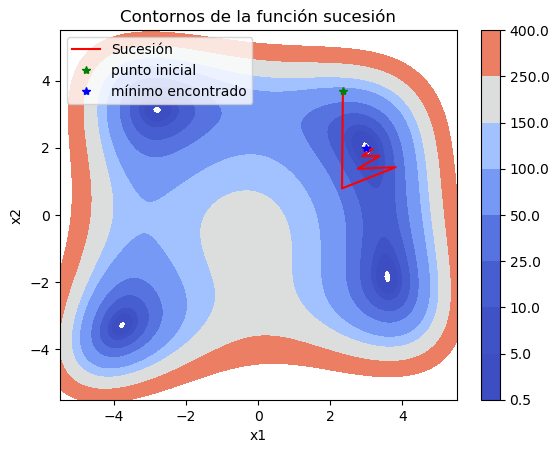

In [204]:
x0  = np.array([0,0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Himmelblau,D_Himmelblau,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$

   

In [205]:
# Definir la función f
def Beale(x):
    return (1.5 - (x[0]) + (x[0])*(x[1]))**2 + (2.25 - (x[0]) + (x[0])*(x[1])**2)**2 + (2.625 - (x[0]) + (x[0])*(x[1])**3)**2

def D_Beale(x):
    Partial_Beale_dx1 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*(-1 + (x[1])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(-1 + (x[1])**2) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(-1 + (x[1])**3)
    Partial_Beale_dx2 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*((x[0])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(2*(x[0])*(x[1])) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(3*(x[0])*(x[1])**2)
    return np.array([Partial_Beale_dx1, Partial_Beale_dx2])


$$ \mathbf{x}_0 = (2.,3.) $$


It =  954
x_k       =  [3.  0.5]
f(x_k)    =  3.458677244354463e-13
||gk||   =  1.0577314771034022e-06
a_k promedio=  0.0429799254623484
It promedio (Backtracking)=  14.20020964360587
Sí se cumplio el criterio de convergencia


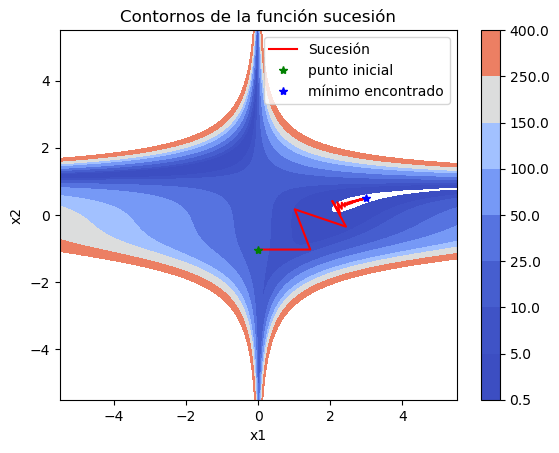

In [206]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (2.,4.) $$

It =  16780
x_k       =  [3.  0.5]
f(x_k)    =  7.05690736578934e-13
||gk||   =  1.489433225921063e-06
a_k promedio=  0.00678055872559893
It promedio (Backtracking)=  24.147318235995233
Sí se cumplio el criterio de convergencia


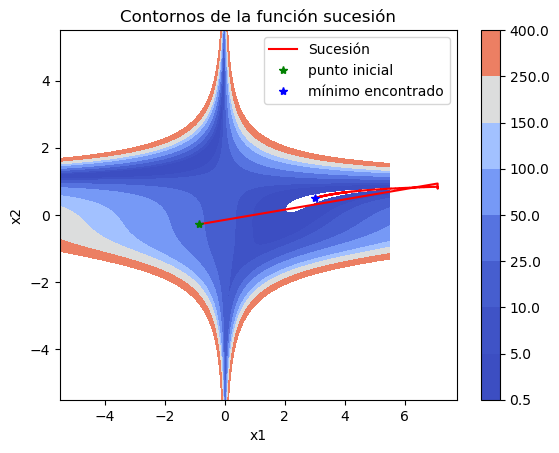

In [207]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$


In [208]:
def Rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return suma

def D_Rosenbrock(x):
    n = len(x)
    gradient = np.zeros(n)
    for i in range(n-1):
        gradient[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i+1] += 200 * (x[i+1] - x[i]**2)
    return gradient

$$ \mathbf{x}_0 = (-2.1, 4.5) $$



It =  20001
x_k       =  [1. 1.]
f(x_k)    =  5.786142814534731e-10
||gk||   =  4.055485538876369e-05
a_k promedio=  0.0015960391616050493
It promedio (Backtracking)=  29.33468326583671
Sí se cumplio el criterio de convergencia


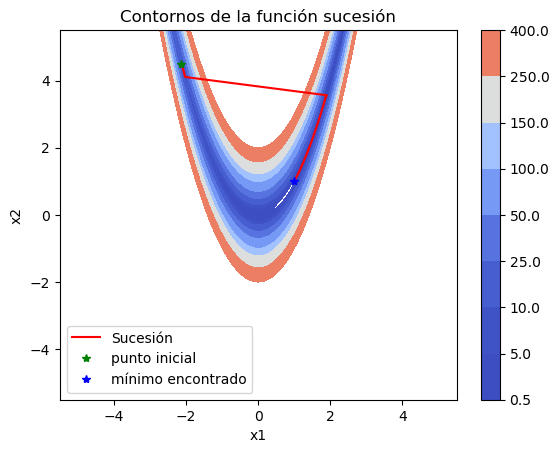

In [209]:

x0  = np.array([-2.1,4.5])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (-1.2, 1.0) $$

It =  9012
x_k       =  [1.     1.0001]
f(x_k)    =  1.1972240025888327e-09
||gk||   =  5.83755133971994e-05
a_k promedio=  0.002042840552546461
It promedio (Backtracking)=  27.895139813581892
Sí se cumplio el criterio de convergencia


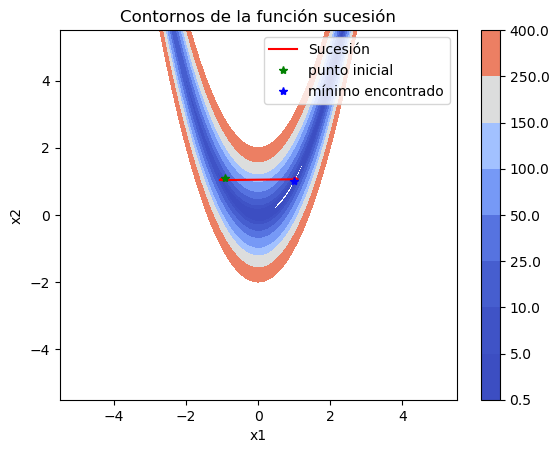

In [210]:
x0  = np.array([-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$

In [211]:
x0  = np.array([-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  13732
x_k       =  [1.     1.     1.     1.     1.     1.     1.     0.9999 0.9999 0.9997]
f(x_k)    =  2.412206105916862e-08
||gk||   =  0.00029540564065148737
Sí se cumplio el criterio de convergencia


$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

In [212]:
x0  = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  12012
x_k       =  [1.     1.     1.     1.     1.     0.9999 0.9999 0.9998 0.9996 0.9991]
f(x_k)    =  2.507471368192847e-07
||gk||   =  0.0010930664811850748
Sí se cumplio el criterio de convergencia


3. Nocedal sugiere que la constante $c_1$ sea del orden de $0.0001$. 
   Use $c_1=0.0001$ y  repeta la prueba con la función de Beale y 
   explique en qué casos conviene usar un valor grande o pequeño de $c_1$.

It =  29999
x_k       =  [-0.0096  6.7213]
f(x_k)    =  5.500622340349735
||gk||   =  1.1317114716073688
a_k promedio=  1.643653436291732e-05
It promedio (Backtracking)=  51.430414347144904


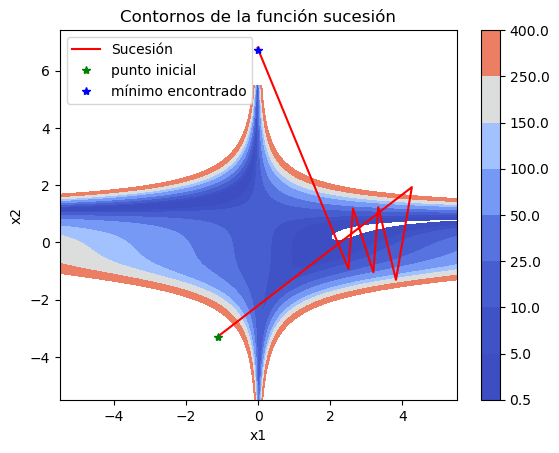

In [213]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n) * tau

c=0.0001
xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

It =  10439
x_k       =  [3.0001 0.5   ]
f(x_k)    =  5.071754940561634e-10
||gk||   =  6.0726415242901256e-05
a_k promedio=  0.008233717785771588
It promedio (Backtracking)=  23.25615480410001
Sí se cumplio el criterio de convergencia


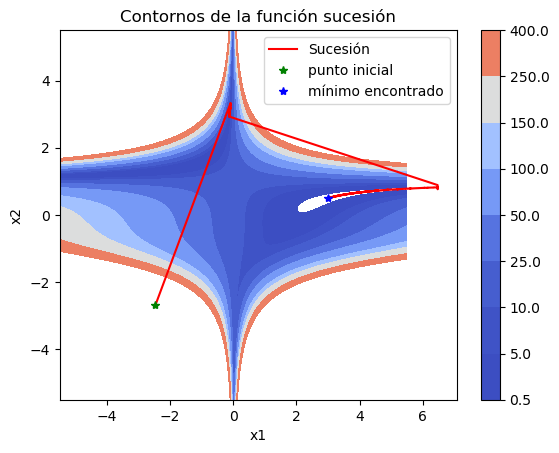

In [214]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau


xk, k, indicador, m = descenso_maximo_backtracking(Beale,D_Beale,x0,aini,rho,c,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

$\color{lightblue}{Ejercicio \space 2}$ <br>

1. Modifique la función del Punto 2 del Ejercicio 1 de modo que en la iteración
   $k=0$ se invoque a la función que  ejecuta el backtracking usando el valor
   $\alpha_{ini}$ dado, es decir,   
   
   $backtracking(f, \mathbf{x}_k, f_k, \nabla f_k, \mathbf{p}_k, \alpha_{ini}, \rho, c_1, N_b)$
   
   y para $k>0$ se calcule el valor inicial del tamaño de paso como
   
$$ \bar{\alpha} = \alpha_{k-1} \frac{\nabla f_{k-1}^\top \mathbf{p}_{k-1}}{\nabla f_{k}^\top \mathbf{p}_k} $$

   y se use este valor al ejercutar backtracking:
   $backtracking(f, \mathbf{x}_k, f_k, \nabla f_k, \mathbf{p}_k, \bar{\alpha}, \rho, c_1, N_b).$
   


In [225]:
def descenso_maximo_backtracking_mod(f,df,x0,alpha_ini,rho,c,tau,max_iter,max_iter_b):
    '''
    Esta funcion busca el minimo de la funcion f usando la tecnica de backtracking

    Parametros: 
        f: función a optimizar
        df: gradiente de f
        x_0: valor inicial
        tau,N: tolerancia y numero maximo de iteraciones (descenso)
        parametros de 

        NOTA:los argumentos predeterminados son específicos para este ejercicio y n=2
    
    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de iteraciones
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array)
        
    '''
    n=len(x0)
    x_k=x0
    indicador=False
    f_k=f(x_k)
    df_k=df(x_k)
    df_k_anterior=df(x_k)

    if n==2:
        m = np.zeros((max_iter+1,4))
        m[0,:] = x0[0],x0[1],1,0
    
 
    for k in range(max_iter):
        #calculmos pk y ak
        p_k=-df_k
        p_k_anterior=-df_k_anterior

        if k==0:
            a_k,i,ind=backtracking(alpha_ini,rho,c,x_k,f,f_k,df_k,p_k,max_iter_b)
        else:
            a1=(np.dot(df_k_anterior,p_k_anterior)/np.dot(df_k,p_k))
            a=a_k*min(100,a1)
            a_k,i,ind=backtracking(a,rho,c,x_k,f,f_k,df_k,p_k,max_iter_b)
   
        if not ind:
            print('Insuficientes iteraciones Backtracking', a_k)


        df_k_anterior=df(x_k)

        x_k=x_k+(a_k*p_k)
        
        if n==2:
            m[k,:]= x_k[0],x_k[1],a_k,i


        if norm(a_k*p_k)<tau:#si se cumple la condicion de tolerania:
            indicador=True #indicador verdadero
            break #y romepos el ciclo

        f_k=f(x_k)
        df_k=df(x_k)

        
    if n==2:
        return x_k,k,indicador,m
    
    return x_k,k,indicador,None

#definicion de funcion para para las graficas dee los contornos

2. Repita las pruebas del Ejercicio 1, imprimiendo los mismos resultados:

**Función de Himmelblau:**

It =  19
x_k       =  [3.0001 2.    ]
f(x_k)    =  1.8997930415296788e-07
||gk||   =  0.005591051222599443
a_k promedio=  0.020801975780112482
It promedio (Backtracking)=  5.526315789473684
Sí se cumplio el criterio de convergencia


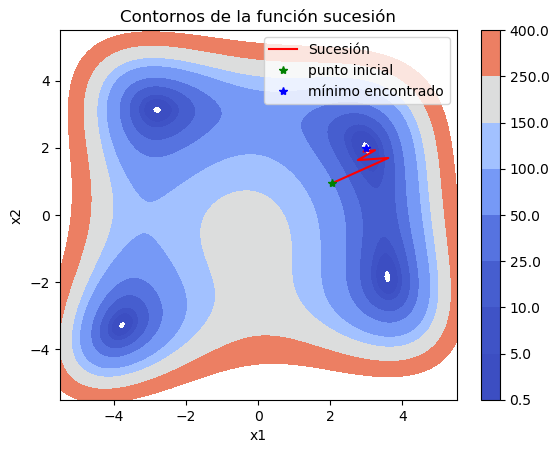

In [226]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Himmelblau,D_Himmelblau,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

It =  13
x_k       =  [2.9957 1.9973]
f(x_k)    =  0.0010416899590746092
||gk||   =  0.4122055569875804
a_k promedio=  0.03560188674502171
It promedio (Backtracking)=  3.8461538461538463
Sí se cumplio el criterio de convergencia


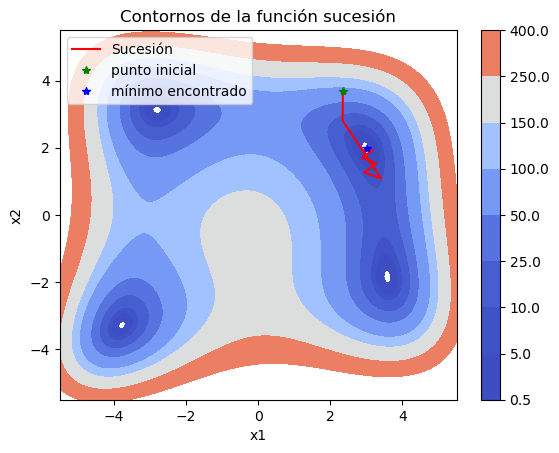

In [234]:
x0  = np.array([0,0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Himmelblau,D_Himmelblau,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Himmelblau(xk))
print('||gk||   = ', np.linalg.norm(D_Himmelblau(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Beale :**

It =  108
x_k       =  [2.972 0.493]
f(x_k)    =  0.00012967801903854324
||gk||   =  0.009496468249999177
a_k promedio=  0.07876226926492584
It promedio (Backtracking)=  0.8981481481481481
Sí se cumplio el criterio de convergencia


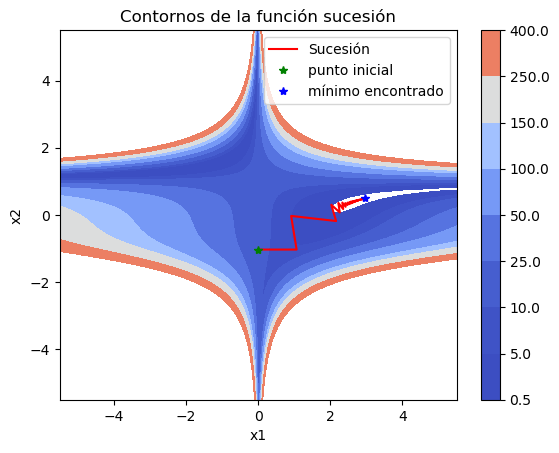

In [228]:
x0  = np.array([2,3])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

It =  117
x_k       =  [2.9705 0.4927]
f(x_k)    =  0.00014419188743309386
||gk||   =  0.012692291583329423
a_k promedio=  0.07126204237601971
It promedio (Backtracking)=  0.8376068376068376
Sí se cumplio el criterio de convergencia


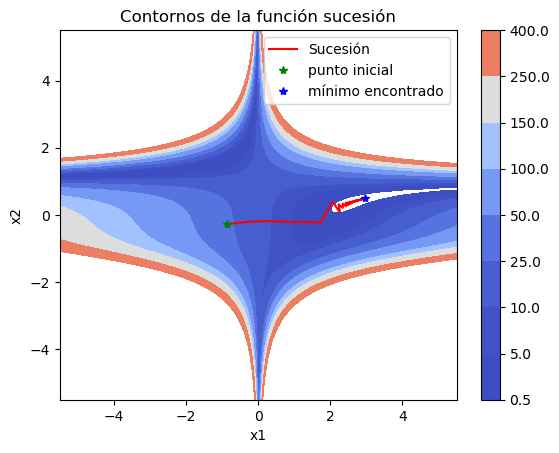

In [229]:
x0  = np.array([2,4])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Beale,D_Beale,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Beale(xk))
print('||gk||   = ', np.linalg.norm(D_Beale(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

    
# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

**Función de Rosenbrock:**

It =  12
x_k       =  [-2.1167  4.4869]
f(x_k)    =  9.718008304750361
||gk||   =  1.5686347693704765
a_k promedio=  0.0005155246805395341
It promedio (Backtracking)=  5.333333333333333
Sí se cumplio el criterio de convergencia


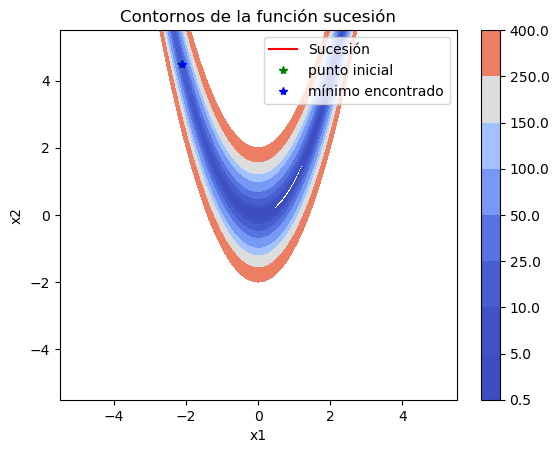

In [230]:

x0  = np.array([-2.1,4.5])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

It =  321
x_k       =  [0.7048 0.4956]
f(x_k)    =  0.08728235902472983
||gk||   =  0.3571450398547226
a_k promedio=  0.005887223958685509
It promedio (Backtracking)=  0.24610591900311526
Sí se cumplio el criterio de convergencia


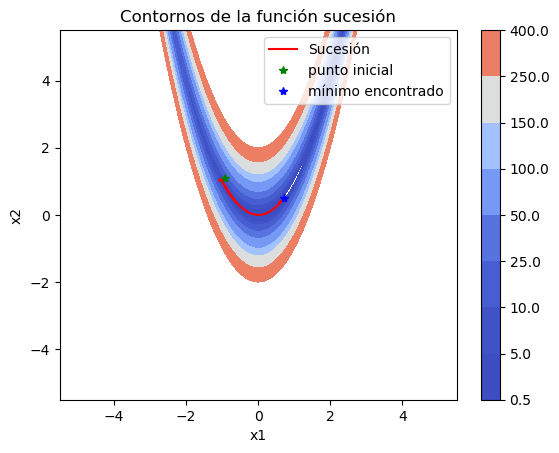

In [231]:

x0  = np.array([-1.2,1.0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))
print('a_k promedio= ', np.sum(m[:,2])/k)
print('It promedio (Backtracking)= ', np.sum(m[:,3])/k)

if(indicador):
    print("Sí se cumplio el criterio de convergencia")

# Usamos list comprehension para crear la lista de puntos
sucesion = [[fila[0], fila[1]] for fila in m[:k]]

contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

In [232]:

x0  = np.array([-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")


It =  136
x_k       =  [9.4136e-01 8.8624e-01 7.8648e-01 6.1987e-01 3.8732e-01 1.5546e-01
 3.2793e-02 1.1080e-02 1.0021e-02 1.0037e-04]
f(x_k)    =  4.220041900907128
||gk||   =  2.423244695991925
Sí se cumplio el criterio de convergencia


In [233]:

x0  = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0])
n   = len(x0)
tau = np.sqrt(n) * tau

xk, k, indicador, m = descenso_maximo_backtracking_mod(Rosenbrock,D_Rosenbrock,x0,aini,rho,c1,tau,N,Nb)

print('It = ', k)
print('x_k       = ', xk)
print('f(x_k)    = ', Rosenbrock(xk))
print('||gk||   = ', np.linalg.norm(D_Rosenbrock(xk)))


if(indicador):
    print("Sí se cumplio el criterio de convergencia")

It =  20
x_k       =  [6.5737e-01 4.4384e-01 1.9551e-01 4.7233e-02 1.2088e-02 1.0246e-02
 1.0209e-02 1.0204e-02 1.0004e-02 1.0014e-04]
f(x_k)    =  6.948916414555616
||gk||   =  4.827469242938458
Sí se cumplio el criterio de convergencia


3. Con base en el valor promedio de las iteraciones realizadas por el algoritmo de backtracking,
   el valor $k$ y las gráficas, escriba un comentario sobre si el cambio realizado ayuda
   al desempeño del método.

* En general el desempeño es mejor, para la función de Himmelblau el algoritmo encuentra al rededor de tres veces más rápido el mínimo.
para la segunda, mientras en el ejercico fueron miles de iteraciones, en con el algoritmo modificado bajó a 112 y 117. Para la última función hubo problemas con los puntos con $n>2$ y con el punto $[-2.1,4.5]$ que no encuentran el mínimo.
Sin embargo para el otro punto, se encuentran  en 300 iteraciones, mucho menos que las 9000 del primer algoritmo.

* Es decir, en general es mejor el algoritmo modificado aunque no siempre converge al mínimo.

$\color{lightblue}{Ejercicio \space 3}$ <br>

3.1 Verificamos si $p_0$ es dirección de descenso:

* El gradiente de f:
\begin{align*}
f(x_1, x_2) &= 5 + (x_1)^2 + (x_2)^2 \\
\nabla f(x_1, x_2) &= \nabla f{x_1}{x_2} \\
&= (2x_1, 2x_2)
\end{align*}

\begin{align*}
\implies \nabla f(\textbf{x}_0)= (-2, 2)
\end{align*}

* Dirección p:

\begin{align*}
\textbf{p}_0=(1,0) 
\end{align*}


\begin{align*}
&\implies \nabla f(\textbf{x}_0)\textbf{p}_0=(-2,2)^T (1,0)=-2+0=-2\\
\end{align*}

$$\implies \nabla f(\textbf{x}_0)\textbf{p}_0 <0$$

Por lo que $p_0$ es dirección de descenso


3.2 Encontramos $\alpha_{max}$ que satisface la dirección de descenso:


* f evaluada en $x_0 + p_0$ 
$$f(x_0 + p_0)=f((-1,1)+(1,0))=f(0,1)=6$$

* f evaluada en $x_0$

$$f(x_0)=f(-1,1)=7$$

*Establecemos la desigualdad de la condición de descenso suficiente:

$$f(x_0 + p_0) \leq f(x_0) + c_1\alpha \textbf{p}_0^T \nabla f(x_0) $$

$$6 \leq 7+ 10^{-4} \alpha (-2)$$

*despejamos $\alpha$

$$\alpha \leq 20^{4}$$

$\color{lightblue}{Ejercicio \space 4}$ <br>

Sea $f ∶ Rn → R$ y S una matriz no singular de tamaño $n \times n$. Si $x = Sy$ para $y \in Rn$ y definimos
$g(y) = f(Sy)$.

* A plicando la regla de la cadena muestre que $\nabla g(y) = S^{⊤} \nabla f(x)$


Partimos del gradiente de $g(y)$:
$$\nabla _y g(y)= \nabla _y f(Sy)=\nabla _y f(x)$$

$$\implies \nabla _y g(y)= \nabla _x f(x) * \nabla _y x$$

$$\implies \nabla _y g(y)= \nabla _x f(x) * \nabla _y Sy $$

S es una matriz y $ \nabla _y y=(1,1,1,1...)$, por lo que 

$$\nabla _y g(y)= S^{⊤}  \nabla _x f(x)   $$

* Muestre que $−D\nabla𝑓(x_k)$ con $D=SS^{⊤}$ es una dirección de descenso

Partimos del producto entre eñ grandiente y  $ -D\nabla f(x)$



$$\nabla f(x)^{⊤} [-D\nabla f(x)]=-\nabla f(x)^{⊤}  SS^{⊤}  \nabla f(x)$$

$$\implies -[\nabla f(x)^{⊤}  S][S^{⊤}  \nabla f(x) ]$$

$$\implies -[\nabla f(x)  S^{⊤}]^{⊤}[S^{⊤}  \nabla f(x) ]$$


Pero usando que $\nabla _y g(y)= S^{⊤}  \nabla _x f(x) $ (resultado anterior)


$$\implies \nabla f(x)^{⊤} [-D\nabla f(x)]=-[\nabla _y g(y)]^{⊤}[\nabla _y g(y)]=-||\nabla _y g(y)||^2$$

Y la norma siempre es mayor o igual que cero, por lo que 

$$\nabla f(x)^{⊤} [-D\nabla f(x)] \leq 0$$

Así que $-D\nabla f(x)$ es una dirección de descenso